# Object Detection

In [87]:
# Importing necessary packages

import numpy as np
import argparse
import cv2
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
from IPython.display import Image

In [102]:
# Defining a disctionary containing all the arguments to be passed

args_dict = edict({'image':'images/third.jpg' , 'prototxt':'MobileNetSSD_deploy.prototxt.txt',
                   'model':'MobileNetSSD_deploy.caffemodel', 'confidence':0.2})

In [103]:
args_dict['image']

'images/third.jpg'

In [104]:
# initialize the list of class labels MobileNet SSD was trained to detect

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]

In [105]:
#generate a set of bounding box colors for each class

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [106]:
COLORS.shape

(21, 3)

In [107]:
for i in range(len(COLORS)):
        print(COLORS[i])

[ 25.46179914  80.42684778 207.17750926]
[105.33251168 215.63664751 155.6336111 ]
[114.77899979 207.99645219  50.32330512]
[141.5143449  129.4627776  216.12657143]
[110.1447964  103.38827391 243.43547205]
[ 26.90573866  57.0585988  135.80527873]
[ 22.42974005 193.85690202  58.55530972]
[141.47899104 113.32033297  60.85515965]
[187.0735569  229.64553845 124.31264139]
[140.25387425  80.59639903 203.96050004]
[187.80992797 127.48225185 203.33800275]
[215.19806256 153.72369925  34.9300487 ]
[ 57.69896508 157.54790866  88.88939746]
[ 81.06993846 150.85938163   0.30625934]
[171.9704158  159.35746202 116.47392533]
[ 74.32902575  68.15970233 144.79732455]
[ 68.24215563 186.59932384  12.87343191]
[103.40022547   9.51397448 102.18475321]
[138.03759887 115.17827147 215.86916844]
[  3.23004053 123.56676987  23.16119695]
[224.73099656  52.7320966   57.78925158]


In [108]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args_dict["prototxt"], args_dict["model"])

[INFO] loading model...


shape of immported Image = (343, 449, 3)


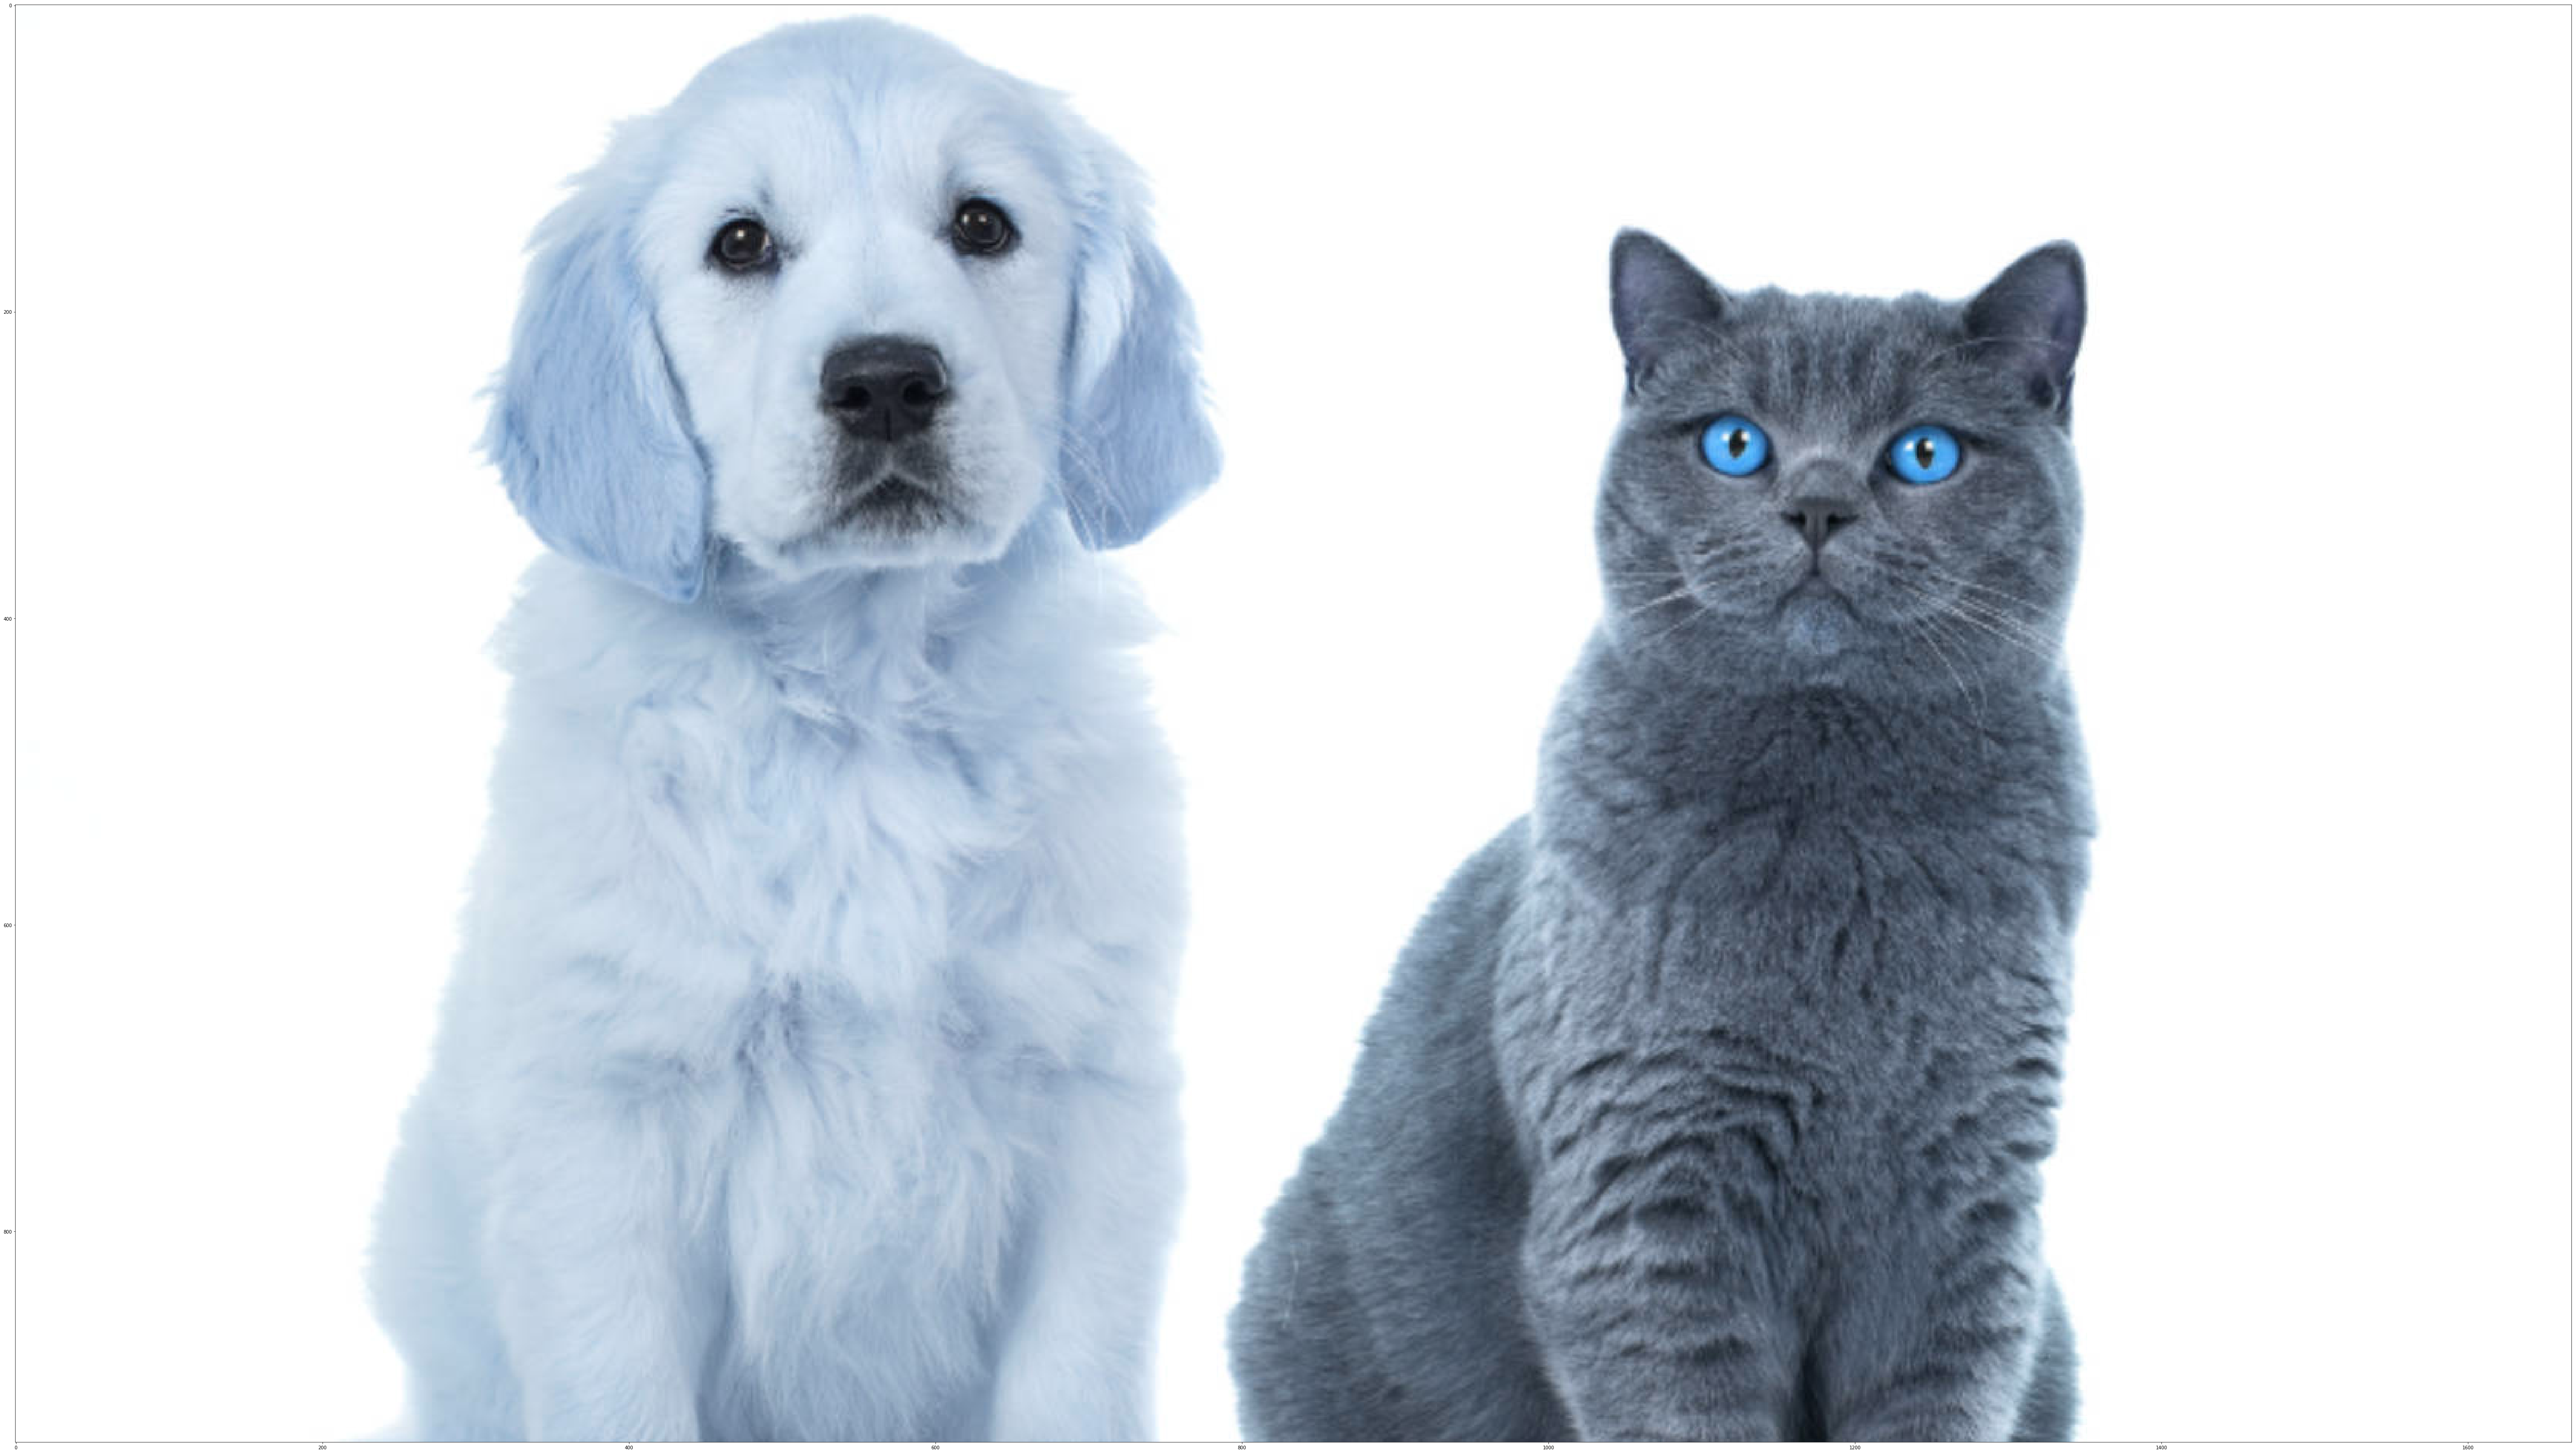

In [109]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
print(f'shape of immported Image = {image.shape}')
image = cv2.imread(args_dict['image'])
plt.figure(figsize=(100,100))
plt.imshow(image)
plt.show()

In [110]:
(h,w) = image.shape[0:2]

In [111]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

In [112]:
blob.shape

(1, 3, 300, 300)

In [113]:
# pass the blob through the network and obtain the detections and predictions

print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [114]:
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > args_dict['confidence']:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        idx = int(detections[0, 0, i, 1])
        (startX, startY, endX, endY) = box.astype('int')
        cv2.rectangle(image, (startX, startY), (endX, endY), COLORS[idx], 2)
        
        #Label for predictions
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence*100)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
        
        
cv2.imshow("Output", image)
cv2.waitKey(0)

-1

## Object Detection Results

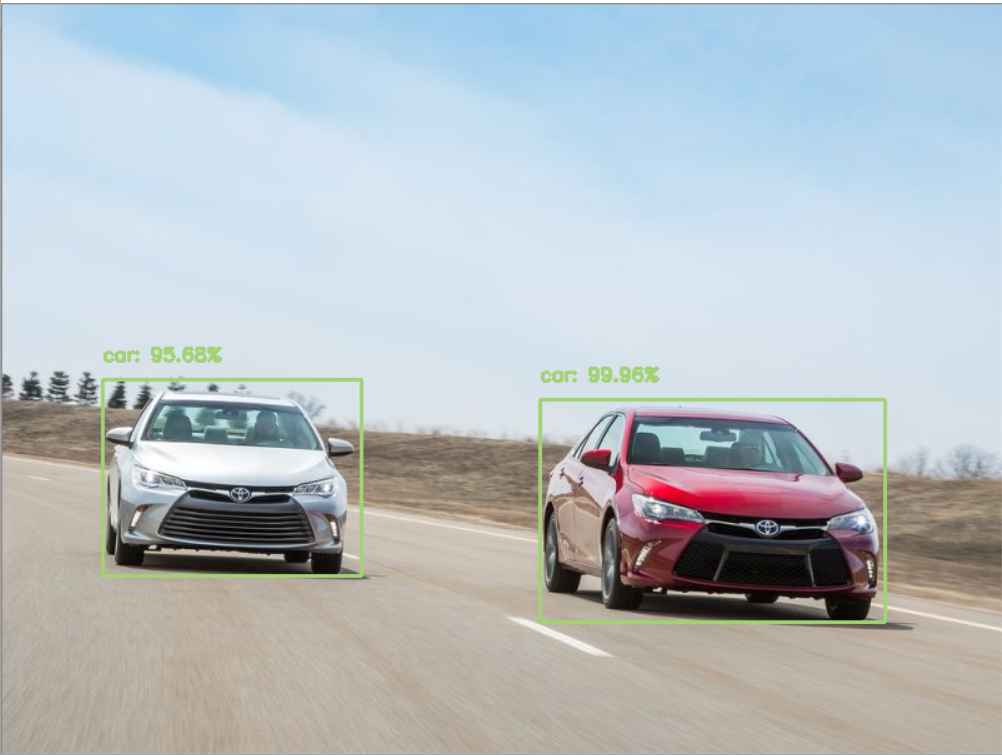

In [86]:
Image('images/first_prediction.png')

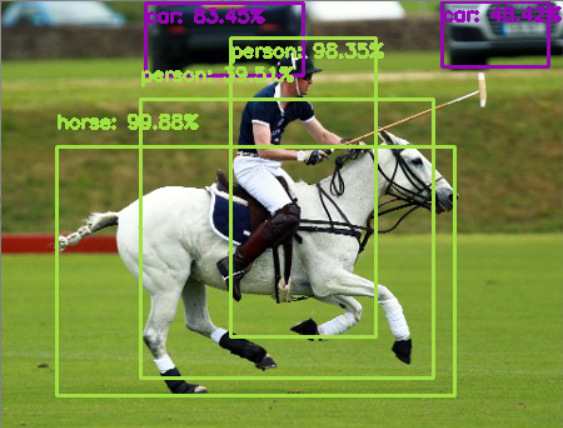

In [101]:
Image('images/second_prediction.png')

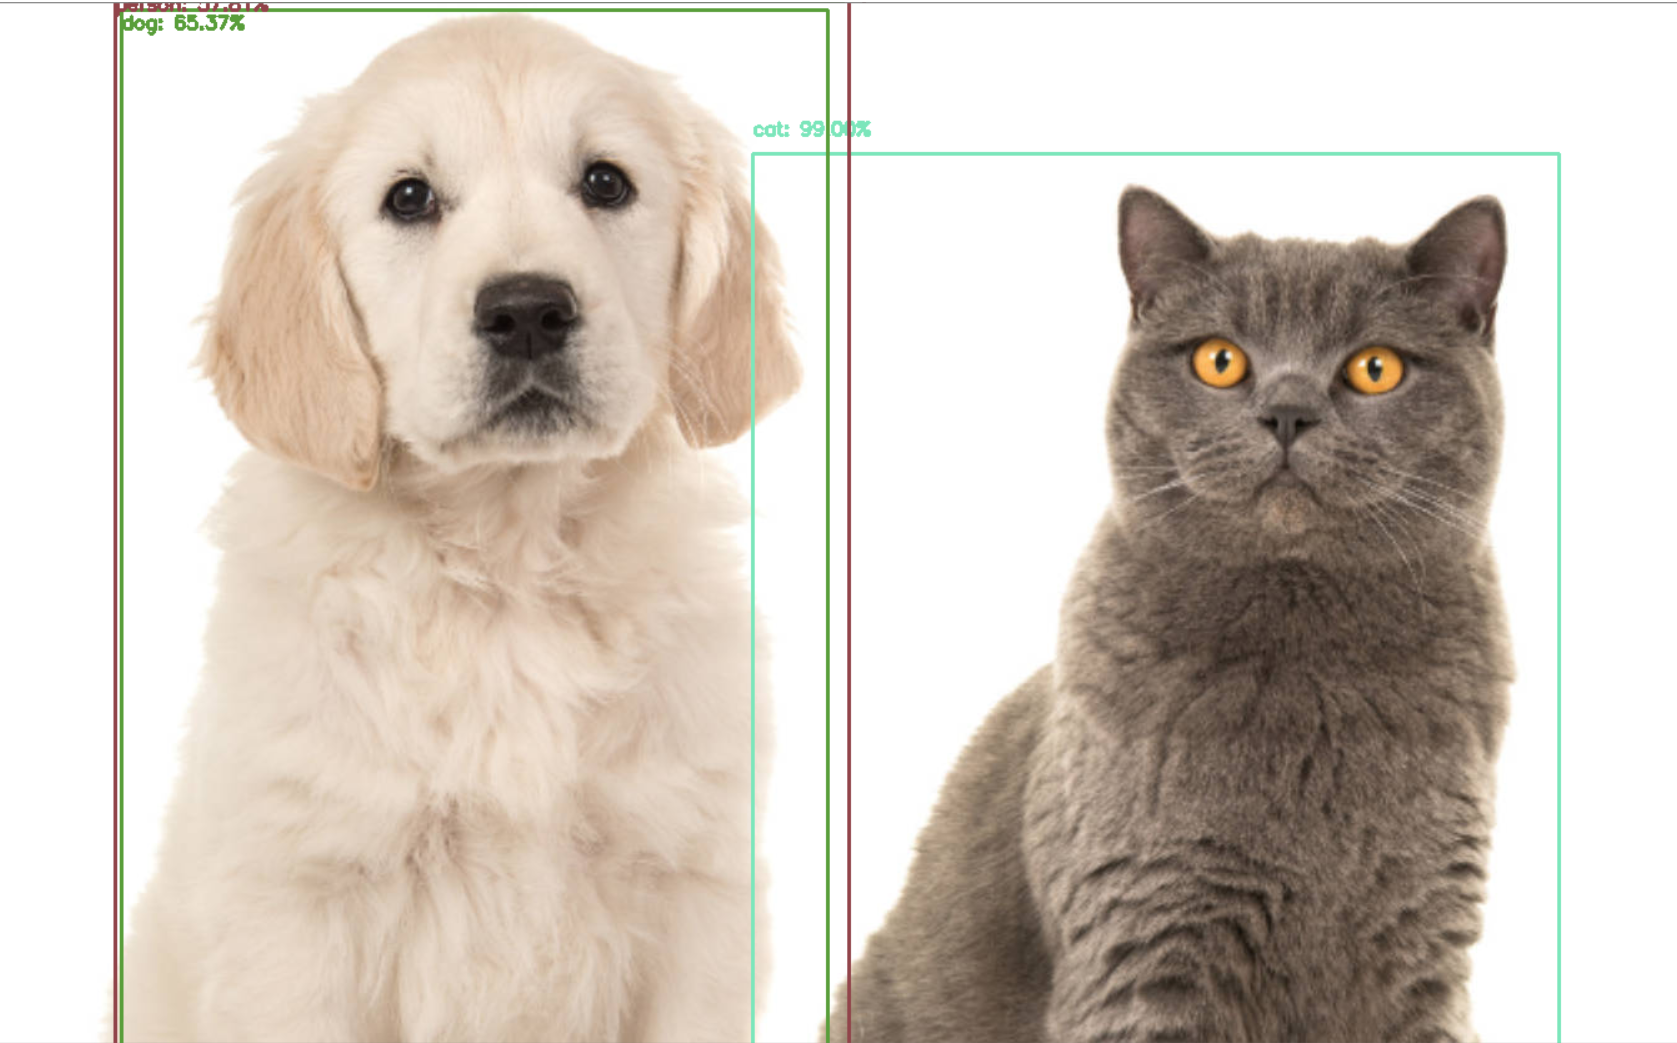

In [116]:
Image('images/third_prediction.png')